<a href="https://colab.research.google.com/github/hongphuong298/hongphuong_ead/blob/main/notebookdce31ff26c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


Kaggle credentials set.


In [47]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

data_science_bowl_2018_path = kagglehub.competition_download('data-science-bowl-2018')

print('Data source import complete.')


Data source import complete.


In [48]:
from google.colab import files

# Upload file kaggle.json
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lethihongphuong","key":"3d84c164e05706a93d0e9f59f611618e"}'}

In [51]:
import os
import shutil

# Đường dẫn tới thư mục và tệp
destination_path = '/root/.kaggle/kaggle.json'

# Tạo thư mục .kaggle nếu chưa có
os.makedirs('/root/.kaggle', exist_ok=True)

# Nếu tệp đã tồn tại, xóa nó trước khi di chuyển tệp mới
if os.path.exists(destination_path):
    os.remove(destination_path)

# Di chuyển tệp kaggle.json vào thư mục .kaggle
shutil.move('kaggle.json', destination_path)


'/root/.kaggle/kaggle.json'

In [52]:
# Cấp quyền cho file để sử dụng
os.chmod('/root/.kaggle/kaggle.json', 600)


In [ ]:
# rm -rf /content/data-science-bowl-2018

In [53]:
!kaggle competitions download -c data-science-bowl-2018


 97% 346M/358M [00:05<00:00, 129MB/s]
100% 358M/358M [00:05<00:00, 70.9MB/s]


In [55]:
import zipfile

# Đường dẫn đến file zip đã tải
zip_path = '/content/data-science-bowl-2018.zip'

# Thư mục đích để giải nén
extract_to = '/content/data-science-bowl-2018'

# Giải nén
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print(f"Dataset extracted to: {extract_to}")


FileNotFoundError: [Errno 2] No such file or directory: '/content/data-science-bowl-2018.zip'

In [56]:
!pip install -U albumentations

In [57]:
import os
import time
import copy
from collections import defaultdict
import torch
import shutil
import pandas as pd
from skimage import io, transform
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms, utils
from torch import nn
from albumentations import (HorizontalFlip, ShiftScaleRotate, Normalize, Resize, Compose, GaussNoise)
import cv2
import torchvision.transforms as transforms
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss,Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD
import torch.nn.functional as F
from PIL import Image
from torch import nn
import zipfile
import tqdm
import random

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

def reset_seed():
  torch.manual_seed(42)
  random.seed(42)
  torch.cuda.manual_seed(42)
reset_seed()

In [ ]:
import zipfile
import os

# Đường dẫn đến file zip
zip_path = '/content/data-science-bowl-2018/stage1_train.zip'

# Thư mục đích để giải nén
extract_to = '/content/EMCAD/data'

# Tạo thư mục đích nếu chưa tồn tại
os.makedirs(extract_to, exist_ok=True)

# Giải nén file zip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print(f"Dataset extracted to: {extract_to}")


In [58]:
seed = 42
np.random.seed = seed

img_size = 256
IMG_WIDTH = img_size
IMG_HEIGHT = img_size
IMG_CHANNELS = 3

In [59]:
!git clone https://github.com/SLDGroup/EMCAD.git

Cloning into 'EMCAD'...
remote: Enumerating objects: 195, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 195 (delta 7), reused 0 (delta 0), pack-reused 177 (from 1)
Receiving objects: 100% (195/195), 2.02 MiB | 16.45 MiB/s, done.
Resolving deltas: 100% (77/77), done.


In [60]:
cd /content/EMCAD

/content/EMCAD


In [75]:
!pip install -r /content/EMCAD/requirements.txt

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.3/156.3 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 926.4/926.4 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.4/52.4 MB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 7.8 MB/s eta 0:00:00
  Created wheel for warmup-scheduler: filename=warmup_scheduler-0.3-py3-none-any.whl size=2971 sha256=6534221e8774bbe5111cf5a65b26f0b21dabfe084c672036c381209d29009762
  Stored in directory: /root/.cache/pip/wheels/59/01/9e/d1820991c32916e9808c940f572b462f3e46427f3e76c4d852
  Created wheel for medpy: filename=MedPy-0.5.2-cp310-cp310-linux_x86_64.whl size=762838 sha256=57737cbf7450452543ea7703518bbf20c93b3e5298654bb517f0d5c9ac2ab522
  Stor

In [61]:
cd /content/EMCAD/lib/

/content/EMCAD/lib


In [62]:
import argparse
import logging
import os
import random
import numpy as np
import torch
import torch.nn as nn
import torch.backends.cudnn as cudnn
from lib.networks import EMCADNet


In [63]:
import sys
import torch.optim as optim
from torch.nn import CrossEntropyLoss
from torch.utils.data import Dataset
from torch.utils.tensorboard import SummaryWriter
from tqdm import tqdm
from skimage import io, transform
import albumentations as A
from albumentations.pytorch import ToTensorV2


In [ ]:
# !mkdir /content/EMCAD/pretrained_pth/pvt

In [64]:
ls /content/EMCAD/pretrained_pth/pvt

pvt_v2_b0.pth  pvt_v2_b2_li.pth  pvt_v2_b3.pth  pvt_v2_b5.pth
pvt_v2_b1.pth  pvt_v2_b2.pth     pvt_v2_b4.pth


In [65]:
cd /content/EMCAD/lib

/content/EMCAD/lib


In [66]:
import os
import numpy as np
from skimage import io, transform
from torch.utils.data import Dataset
import albumentations as A
from albumentations.pytorch import ToTensorV2

def get_transforms(mean, std):
    list_transforms = A.Compose([
        A.HorizontalFlip(p=0.5),
        A.Normalize(mean=mean, std=std, p=1.0),
        ToTensorV2()
    ])
    return list_transforms

class NucleiData(Dataset):
    def __init__(self, path):
        self.path = path
        self.folders = os.listdir(path)
        self.transforms = get_transforms(0.5, 0.5)

    def __len__(self):
        return len(self.folders)

    def __getitem__(self, idx):
        image_folder = os.path.join(self.path, self.folders[idx], 'images/')
        mask_folder = os.path.join(self.path, self.folders[idx], 'masks/')
        image_path = os.path.join(image_folder, os.listdir(image_folder)[0])

        # Read and preprocess image
        img = io.imread(image_path)[:, :, :3].astype('float32')
        img = transform.resize(img, (128, 128))

        # Get mask and ensure it's float32
        mask = self.get_mask(mask_folder, 128, 128).astype('float32')

        # Apply transformations
        augmented = self.transforms(image=img, mask=mask)
        img = augmented['image']  # This will be [3, 128, 128]
        mask = augmented['mask']

        # Reshape mask to [1, 128, 128]
        mask = mask.permute(2, 0, 1)  # Change from [128, 128, 1] to [1, 128, 128]

        return img, mask

    def get_mask(self, mask_folder, IMG_HEIGHT, IMG_WIDTH):
        mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool_)
        for mask_ in os.listdir(mask_folder):
            mask_ = io.imread(os.path.join(mask_folder, mask_))
            mask_ = transform.resize(mask_, (IMG_HEIGHT, IMG_WIDTH))
            mask_ = np.expand_dims(mask_, axis=-1)
            mask = np.maximum(mask, mask_)
        return mask



In [67]:
#loading the data
base_dir = '/content/EMCAD/data/'
data = NucleiData(base_dir)

In [68]:
print(data.__len__())
data.__getitem__(0)

670


(tensor([[[-0.0599, -0.0477, -0.1504,  ...,  0.7107,  0.7188,  0.7277],
          [-0.0150,  0.0470,  0.0209,  ...,  0.7269,  0.7330,  0.7375],
          [ 0.0533,  0.1744,  0.2834,  ...,  0.7216,  0.7265,  0.7307],
          ...,
          [ 0.7960,  0.9073,  0.9054,  ...,  0.5441,  0.7413,  0.8136],
          [ 0.7974,  0.9046,  0.9042,  ...,  0.7976,  0.8093,  0.8180],
          [ 0.7973,  0.9030,  0.9015,  ...,  0.8145,  0.8159,  0.8191]],
 
         [[-0.0599, -0.0477, -0.1504,  ...,  0.7107,  0.7188,  0.7277],
          [-0.0150,  0.0470,  0.0209,  ...,  0.7269,  0.7330,  0.7375],
          [ 0.0533,  0.1744,  0.2834,  ...,  0.7216,  0.7265,  0.7307],
          ...,
          [ 0.7960,  0.9073,  0.9054,  ...,  0.5441,  0.7413,  0.8136],
          [ 0.7974,  0.9046,  0.9042,  ...,  0.7976,  0.8093,  0.8180],
          [ 0.7973,  0.9030,  0.9015,  ...,  0.8145,  0.8159,  0.8191]],
 
         [[-0.0599, -0.0477, -0.1504,  ...,  0.7107,  0.7188,  0.7277],
          [-0.0150,  0.0470,

In [69]:
for img,msk in data:
  print(img.shape)
  print(msk.shape)
  break

torch.Size([3, 128, 128])
torch.Size([1, 128, 128])


In [70]:
def mask_convert(mask):
    mask = mask.clone().cpu().detach().numpy()
    mask = mask.transpose((1,2,0))
    std = np.array((0.5))
    mean = np.array((0.5))
    mask  = std * mask + mean
    mask = mask.clip(0,1)
    mask = np.squeeze(mask)
    return mask

# converting tensor to image
def image_convert(image):
    image = image.clone().cpu().numpy()
    image = image.transpose((1,2,0))
    std = np.array((0.5,0.5,0.5))
    mean = np.array((0.5,0.5,0.5))
    image  = std * image + mean
    image = image.clip(0,1)
    image = (image * 255).astype(np.uint8)
    return image

In [71]:
def plot_img(no_):
    iter_ = iter(train_loader)
    images,masks = next(iter_)
    images = images.to(device)
    masks = masks.to(device)
    plt.figure(figsize=(10,6))
    for idx in range(0,no_):
         image = image_convert(images[idx])
         plt.subplot(2,no_,idx+1)
         plt.title('image')
         plt.imshow(image)
    for idx in range(0,no_):
         mask = mask_convert(masks[idx])
         plt.subplot(2,no_,idx+no_+1)
         plt.title('mask')
         plt.imshow(mask,cmap='gray')
    plt.show()

In [72]:

trainset, valset = random_split(data, [580, 90])

train_loader = torch.utils.data.DataLoader(dataset=trainset, batch_size=10, shuffle=True)

val_loader = torch.utils.data.DataLoader(dataset=valset, batch_size=10)

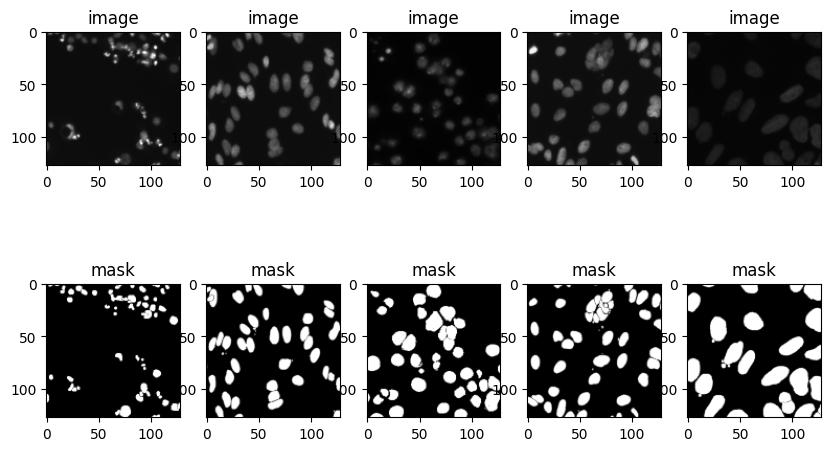

In [73]:
plot_img(5)


In [82]:
cd /content/EMCAD/utils


/content/EMCAD/utils


In [83]:
ls /content/EMCAD/utils

dataloader.py       format_conversion.py  preprocess_synapse_data_3d.py  README.md
dataset_ACDC.py     joint_transforms.py   preprocess_synapse_data.py     transforms.py
dataset_synapse.py  misc.py               __pycache__/                   utils.py


In [84]:
import os
import shutil
import logging
import sys
import torch
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from tensorboardX import SummaryWriter
# from utils.dataset_nuclei import NucleiData
# from utils.utils import powerset, one_hot_encoder, DiceLoss, val_single_volume
from lib.networks import EMCADNet
from tqdm.notebook import tqdm  # Import tqdm cho Jupyter Notebook

In [90]:
from EMCAD.utils.utils import powerset, one_hot_encoder, DiceLoss, val_single_volume

In [87]:
# rm -rf /content/EMCAD/lib/EMCAD

In [92]:
import os
import shutil
import logging
import sys
import torch
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from tensorboardX import SummaryWriter
from tqdm.notebook import tqdm  # Import tqdm cho Jupyter Notebook


In [102]:

# Tạo đối tượng args trực tiếp (thay vì sử dụng argparse)
args = {
    'volume_path': '/content/EMCAD/data/',
    'num_classes': 2,
    'batch_size': 10,
    'max_epochs': 50,
    'base_lr': 1e-4,
    'n_gpu': 1,
    'img_size': 256,
    'list_dir': './train_val_split',
    'kernel_sizes': [1, 3, 5],
    'expansion_factor': 2,
    'dw_parallel': True,
    'activation': 'relu',
    'encoder': 'pvt_v2_b2',
    'pretrain': True
}

# Hàm huấn luyện mô hình
def trainer_nuclei(args, model, snapshot_path):
    logging.basicConfig(filename=snapshot_path + "/log.txt", level=logging.INFO,
                        format='[%(asctime)s.%(msecs)03d] %(message)s', datefmt='%H:%M:%S')
    logging.getLogger().addHandler(logging.StreamHandler(sys.stdout))
    logging.info(str(args))

    # Cấu hình các tham số
    base_lr = args['base_lr']
    num_classes = args['num_classes']
    batch_size = args['batch_size'] * args['n_gpu']
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Tạo dataset và DataLoader
    data = NucleiData(base_dir=args['volume_path'])
    trainset, valset = random_split(data, [580, 90])
    train_loader = DataLoader(dataset=trainset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(dataset=valset, batch_size=batch_size)

    model.to(device)

    # Mất mát và tối ưu hóa
    dice_loss = DiceLoss(num_classes)
    optimizer = optim.AdamW(model.parameters(), lr=base_lr, weight_decay=0.0001)
    writer = SummaryWriter(snapshot_path + '/log')

    max_epoch = args['max_epochs']
    best_performance = 0.0

    # Huấn luyện mô hình với tqdm
    for epoch_num in range(max_epoch):
        model.train()
        # Dùng tqdm để tạo thanh tiến độ cho vòng lặp huấn luyện
        with tqdm(train_loader, desc=f'Epoch {epoch_num + 1}/{max_epoch}', unit='batch') as pbar:
            for i_batch, sampled_batch in enumerate(pbar):
                image_batch, label_batch = sampled_batch['image'].cuda(), sampled_batch['label'].squeeze(1).cuda()

                # Forward pass
                outputs = model(image_batch)
                loss = dice_loss(outputs, label_batch)

                # Backward pass và cập nhật trọng số
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

                # Log các giá trị
                writer.add_scalar('info/loss', loss.item(), epoch_num * len(train_loader) + i_batch)

                pbar.set_postfix(loss=loss.item())  # Cập nhật thanh tiến độ với giá trị loss
                if i_batch % 50 == 0:
                    logging.info('Epoch [%d/%d], Batch [%d/%d], Loss: %.4f', epoch_num + 1, max_epoch, i_batch, len(train_loader), loss.item())

        # Lưu mô hình sau mỗi epoch
        save_mode_path = os.path.join(snapshot_path, f'epoch_{epoch_num + 1}.pth')
        torch.save(model.state_dict(), save_mode_path)

        # Kiểm tra hiệu suất trên tập validation
        performance = inference(args, model, best_performance)
        if best_performance < performance:
            best_performance = performance
            best_model_path = os.path.join(snapshot_path, 'best_model.pth')
            torch.save(model.state_dict(), best_model_path)
            logging.info(f"Saved best model to {best_model_path}")

        logging.info(f"Epoch {epoch_num + 1} completed.")

    writer.close()
    return "Training Finished!"

# Hàm kiểm tra hiệu suất mô hình trên tập test
def inference(args, model, best_performance):
    test_data = NucleiData(base_dir=args['volume_path'], split="test")
    test_loader = DataLoader(test_data, batch_size=1, shuffle=False)

    model.eval()
    metric_list = []

    # Dùng tqdm để tạo thanh tiến độ cho vòng lặp kiểm tra
    with tqdm(test_loader, desc="Testing", unit='batch') as pbar:
        for i_batch, sampled_batch in enumerate(pbar):
            image, label, case_name = sampled_batch["image"].cuda(), sampled_batch["label"].cuda(), sampled_batch["case_name"]
            outputs = model(image)

            # Tính toán và lưu metric, ví dụ: Dice score
            dice_score = val_single_volume(outputs, label)
            metric_list.append(dice_score)
            pbar.set_postfix(dice_score=dice_score)  # Cập nhật thanh tiến độ với giá trị Dice score

    mean_dice = np.mean(metric_list)
    logging.info(f'Mean Dice score on test set: {mean_dice:.4f}')

    if mean_dice > best_performance:
        best_performance = mean_dice
        logging.info(f"New best performance: {best_performance:.4f}")

    return best_performance



In [104]:
# Tạo mô hình EMCADNet với các tham số cấu hình
model = EMCADNet(
    num_classes=args['num_classes'],  # Số lớp trong phân đoạn
    kernel_sizes=args['kernel_sizes'],  # Kích thước kernel cho decoder
    expansion_factor=args['expansion_factor'],  # Hệ số mở rộng cho decoder
    dw_parallel=args['dw_parallel'],  # Chế độ song song cho convolution
    add=True,  # Thêm các lớp residual
    lgag_ks=3,  # Kích thước kernel cho LGAG
    activation=args['activation'],  # Hàm kích hoạt
    encoder=args['encoder'],  # Encoder bạn muốn sử dụng
    pretrain=args['pretrain'] # Có tải trọng lượng pretrained hay không
).cuda()  # Chuyển mô hình sang GPU nếu có

# Load pre-trained weights if pretrain is True
if args['pretrain']:
    pretrained_dict = torch.load('/content/EMCAD/pretrained_pth/pvt/pvt_v2_b2.pth') # Confirmed absolute path

    # Remove the 'module.' prefix from the keys in the pretrained_dict
    pretrained_dict = {k.replace('module.', ''): v for k, v in pretrained_dict.items()}

    model_dict = model.state_dict()

    # Filter out unnecessary keys and update the model's state dict
    pretrained_dict = {k: v for k, v in pretrained_dict.items() if k in model_dict and v.shape == model_dict[k].shape}
    model_dict.update(pretrained_dict)

    # Load the updated state dict into the model
    model.load_state_dict(model_dict, strict=False)  # strict=False allows loading a subset of weights

# Đường dẫn lưu mô hình
snapshot_path = '/content/EMCAD/check/checkpoints'
os.makedirs(snapshot_path, exist_ok=True)

# Bắt đầu huấn luyện
trainer_nuclei(args, model, snapshot_path)

FileNotFoundError: [Errno 2] No such file or directory: './pretrained_pth/pvt/pvt_v2_b2.pth'

In [94]:
import os
path = '/content/EMCAD/pretrained_pth/pvt/pvt_v2_b2.pth'
print(f"File tồn tại: {os.path.exists(path)}")


File tồn tại: True


In [108]:
!zip -r /content/EMCAD.zip /content/EMCAD


Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  adding: content/EMCAD/data/8a65e41c630d85c0004ce1772ff66fbc87aca34cb165f695255b39343fcfc832/masks/b52400346650faf0979870e16e6aa5c35c3d89851e5ede58d59e4f6381ec97c8.png (deflated 26%)
  adding: content/EMCAD/data/8a65e41c630d85c0004ce1772ff66fbc87aca34cb165f695255b39343fcfc832/masks/c312bf4d4777ca16a022218d714a397a274aaa795c065aafc3710ae692fecb33.png (deflated 22%)
  adding: content/EMCAD/data/8a65e41c630d85c0004ce1772ff66fbc87aca34cb165f695255b39343fcfc832/masks/253a066135c22372edab5978e193c97d2bfab6b2dd10c22a67b251a873e079b2.png (deflated 21%)
  adding: content/EMCAD/data/8a65e41c630d85c0004ce1772ff66fbc87aca34cb165f695255b39343fcfc832/masks/ccbde9327aca2cf66f603886b0d77a1220522aba3ab0ce9ee6b6859b2cb517fa.png (deflated 26%)
  adding: content/EMCAD/data/8a65e41c630d85c0004ce1772ff66fbc87aca34cb165f695255b39343fcfc832/masks/50553d8a51387c633af0eecb4453419ed9c2908a27053a85ec458cf8a70ca2ea.png (deflated 26%)
  adding: content/EMCAD

In [106]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from lib.pvtv2 import pvt_v2_b0, pvt_v2_b1, pvt_v2_b2, pvt_v2_b3, pvt_v2_b4, pvt_v2_b5
from lib.resnet import resnet18, resnet34, resnet50, resnet101, resnet152
from lib.decoders import EMCAD


class EMCADNet(nn.Module):
    def __init__(self, num_classes=1, kernel_sizes=[1,3,5], expansion_factor=2, dw_parallel=True, add=True, lgag_ks=3, activation='relu', encoder='pvt_v2_b2', pretrain=True):
        super(EMCADNet, self).__init__()

        # conv block to convert single channel to 3 channels
        self.conv = nn.Sequential(
            nn.Conv2d(1, 3, kernel_size=1),
            nn.BatchNorm2d(3),
            nn.ReLU(inplace=True)
        )

        # backbone network initialization with pretrained weight
        if encoder == 'pvt_v2_b0':
            self.backbone = pvt_v2_b0()
            path = '/content/EMCAD/pretrained_pth/pvt/pvt_v2_b0.pth'
            channels=[256, 160, 64, 32]
        elif encoder == 'pvt_v2_b1':
            self.backbone = pvt_v2_b1()
            path = '/content/EMCAD/pretrained_pth/pvt/pvt_v2_b1.pth'
            channels=[512, 320, 128, 64]
        elif encoder == 'pvt_v2_b2':
            self.backbone = pvt_v2_b2()
            path = '/content/EMCAD/pretrained_pth/pvt/pvt_v2_b2.pth'
            channels=[512, 320, 128, 64]
        elif encoder == 'pvt_v2_b3':
            self.backbone = pvt_v2_b3()
            path = '/content/EMCAD/pretrained_pth/pvt/pvt_v2_b3.pth'
            channels=[512, 320, 128, 64]
        elif encoder == 'pvt_v2_b4':
            self.backbone = pvt_v2_b4()
            path = '/content/EMCAD/pretrained_pth/pvt/pvt_v2_b4.pth'
            channels=[512, 320, 128, 64]
        elif encoder == 'pvt_v2_b5':
            self.backbone = pvt_v2_b5()
            path = '/content/EMCAD/pretrained_pth/pvt/pvt_v2_b5.pth'
            channels=[512, 320, 128, 64]
        elif encoder == 'resnet18':
            self.backbone = resnet18(pretrained=pretrain)
            channels=[512, 256, 128, 64]
        elif encoder == 'resnet34':
            self.backbone = resnet34(pretrained=pretrain)
            channels=[512, 256, 128, 64]
        elif encoder == 'resnet50':
            self.backbone = resnet50(pretrained=pretrain)
            channels=[2048, 1024, 512, 256]
        elif encoder == 'resnet101':
            self.backbone = resnet101(pretrained=pretrain)
            channels=[2048, 1024, 512, 256]
        elif encoder == 'resnet152':
            self.backbone = resnet152(pretrained=pretrain)
            channels=[2048, 1024, 512, 256]
        else:
            print('Encoder not implemented! Continuing with default encoder pvt_v2_b2.')
            self.backbone = pvt_v2_b2()
            path = '/content/EMCAD/pretrained_pth/pvt/pvt_v2_b2.pth'
            channels=[512, 320, 128, 64]

        if pretrain==True and 'pvt_v2' in encoder:
            save_model = torch.load(path, weights_only=True)

            model_dict = self.backbone.state_dict()
            state_dict = {k: v for k, v in save_model.items() if k in model_dict.keys()}
            model_dict.update(state_dict)
            self.backbone.load_state_dict(model_dict)

        print('Model %s created, param count: %d' %
                     (encoder+' backbone: ', sum([m.numel() for m in self.backbone.parameters()])))

        #   decoder initialization
        self.decoder = EMCAD(channels=channels, kernel_sizes=kernel_sizes, expansion_factor=expansion_factor, dw_parallel=dw_parallel, add=add, lgag_ks=lgag_ks, activation=activation)

        print('Model %s created, param count: %d' %
                     ('EMCAD decoder: ', sum([m.numel() for m in self.decoder.parameters()])))

        self.out_head4 = nn.Conv2d(channels[0], num_classes, 1)
        self.out_head3 = nn.Conv2d(channels[1], num_classes, 1)
        self.out_head2 = nn.Conv2d(channels[2], num_classes, 1)
        self.out_head1 = nn.Conv2d(channels[3], num_classes, 1)

    def forward(self, x, mode='test'):

        # if grayscale input, convert to 3 channels
        if x.size()[1] == 1:
            x = self.conv(x)

        # encoder
        x1, x2, x3, x4 = self.backbone(x)
        #print(x1.shape, x2.shape, x3.shape, x4.shape)

        # decoder
        dec_outs = self.decoder(x4, [x3, x2, x1])

        # prediction heads
        p4 = self.out_head4(dec_outs[0])
        p3 = self.out_head3(dec_outs[1])
        p2 = self.out_head2(dec_outs[2])
        p1 = self.out_head1(dec_outs[3])

        p4 = F.interpolate(p4, scale_factor=32, mode='bilinear')
        p3 = F.interpolate(p3, scale_factor=16, mode='bilinear')
        p2 = F.interpolate(p2, scale_factor=8, mode='bilinear')
        p1 = F.interpolate(p1, scale_factor=4, mode='bilinear')

        if mode == 'test':
            return [p4, p3, p2, p1]

        return [p4, p3, p2, p1]



if __name__ == '__main__':
    model = EMCADNet().cuda()
    input_tensor = torch.randn(1, 3, 352, 352).cuda()

    P = model(input_tensor)
    print(P[0].size(), P[1].size(), P[2].size(), P[3].size())



Model pvt_v2_b2 backbone:  created, param count: 24849856
Model EMCAD decoder:  created, param count: 1913515


RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx